In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree


In [63]:
df = pd.read_csv('covid_clinical_data.csv')

In [64]:
my_list = df.columns.values.tolist()

In [65]:
my_list

['ID',
 'Country',
 'Province/State',
 'sample pop',
 'Positive/negative cases',
 'Age',
 'gender',
 'Smoking history',
 'Obesity',
 'Any Comorbidity',
 'Hypertension',
 'Diabetes',
 'Cardiovascular Disease (incl. CAD)',
 'Chronic obstructive lung (COPD)',
 'Cancer (Any)',
 'Liver Disease (any)',
 'Cerebrovascular Disease',
 'Chronic kidney/renal disease',
 'Other',
 'Mortality']

In [66]:
selected = df.iloc[:,6:]
selected



,gender,Smoking history,Obesity,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Mortality
0,1,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.00
1,0,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,NaN,1.00
2,1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.00
3,1,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.00
4,1,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26
4911,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26
4912,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26
4913,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26


In [67]:
updated = selected.fillna(0)

In [68]:
target=updated['Mortality']
target_names=['risk','not_risk']

In [69]:
data = updated.drop("Mortality", axis=1)

feature_names = data.columns
data.head()

,gender,Smoking history,Obesity,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other
0,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [71]:
data.dtypes;

In [72]:
clf = tree.DecisionTreeClassifier()


In [73]:
clf = clf.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'

In [58]:
clf.score(X_test, y_test)

0.8501313628212486

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

ValueError: Unknown label type: 'continuous'

In [61]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [32]:
dropped_age = data.drop("Median Age", axis=1)

In [33]:
feature_names = dropped_age.columns

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dropped_age, target, random_state=42)

In [35]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7520661157024794

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.859504132231405

In [37]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)
# once age is removed as a factor HTN still remains the next big risk factor in mortality 

[(0.17054702513526834, 'Hypertension'),
 (0.1520652519566107, 'Diabetes'),
 (0.12925395079568094, 'Cardiovascular Disease (incl. CAD)'),
 (0.12130759399431099, 'Other'),
 (0.09718771866122188, 'Cancer (Any)'),
 (0.07950807560131634, 'Cerebrovascular Disease'),
 (0.06723408467722147, 'Chronic kidney/renal disease'),
 (0.062002952523386196, 'Chronic obstructive lung (COPD)'),
 (0.05456227951165895, 'Smoking history'),
 (0.046179443204025394, 'Liver Disease (any)'),
 (0.012403573623994135, 'Obesity'),
 (0.0077480503153046125, 'Current drinker')]

In [38]:
data = pd.read_csv("owid-covid-data.csv")


In [39]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69817,ZWE,Africa,Zimbabwe,2021-02-14,35172.0,68.0,88.571,1400.0,2.0,10.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
69818,ZWE,Africa,Zimbabwe,2021-02-15,35222.0,50.0,80.571,1410.0,10.0,10.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
69819,ZWE,Africa,Zimbabwe,2021-02-16,35315.0,93.0,76.286,1414.0,4.0,8.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
69820,ZWE,Africa,Zimbabwe,2021-02-17,35423.0,108.0,79.857,1418.0,4.0,7.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


mean: 61.7 std: 17.5
min: 32.50013993881344 max: 92.49905002092035


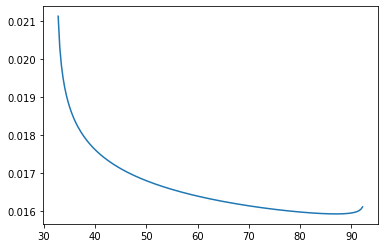

In [69]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    location = min_val
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    # Make scaled beta distribution with computed parameters
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)

np.random.seed(191)

min_val = 32.5
max_val = 92.5
mean = 61.7
std = 17.5
my_dist = my_distribution(min_val, max_val, mean, std)
# Plot distribution PDF
x = np.linspace(min_val, max_val, 191)
plt.plot(x, my_dist.pdf(x))
# Stats
print('mean:', my_dist.mean(), 'std:', my_dist.std())
# Get a large sample to check bounds
sample = my_dist.rvs(size=100000)
print('min:', sample.min(), 'max:', sample.max())


In [51]:
np.savetxt("test.csv", x, delimiter=',');

In [70]:
import statistics 
print(statistics.mean(x))
print(statistics.stdev(x))


62.5
17.45718942452874


In [64]:
import matplotlib.pyplot as plt
from scipy import stats

# -1 to +3 standard deviations apart
r = stats.truncnorm.rvs(-2, 3, loc=61.7, scale=17.5, size=1000)

# plt.hist(r, bins=100, color='blue')
# plt.xlabel("value")
# plt.ylabel("frequency")
# plt.show()

In [67]:
import statistics 
print(statistics.mean(r))
print(statistics.stdev(r))


61.251023364856536
16.30031395442967


In [11]:
import numpy as np
myProb = []
for i in range(1000):
#creates one number out of 0 or 1 with prob p 0.4 for 0 and 0.6 for 1
    test = np.random.choice(np.arange(0, 2), p=[0.91, 0.09])
    myProb.append(test)

In [10]:
myProb

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

SyntaxError: invalid syntax (<ipython-input-68-5284ca20e467>, line 2)